<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

In [2]:
!pip install squarify

  Using cached https://files.pythonhosted.org/packages/0b/2b/2e77c35326efec19819cd1d729540d4d235e6c2a3f37658288a363a67da5/squarify-0.4.3-py3-none-any.whl


In [4]:
from collections import Counter
import re
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [5]:
data = 'https://raw.githubusercontent.com/mkirby1995/NLP/master/State_of_Unions.json'
df = pd.read_json(data)
df = df.sort_values(by = ['year'])

df.head()

,president,year,content
125,Washington,1790,
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...


# Tokenize (Manual)

In [45]:
def tokenize(text):
    sample = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = sample.lower().split()
    return tokens

In [46]:
df['tokens'] = df['content'].apply(tokenize)
df['tokens'].tail()

66     [mr, speaker, mr, vice, president, members, of...
64     [mr, speaker, mr, vice, president, members, of...
79     [mr, speaker, mr, vice, president, members, of...
67     [thank, you, very, much, mr, speaker, mr, vice...
149    [mr, speaker, mr, vice, president, members, of...
Name: tokens, dtype: object

# Analyze Tokens

In [47]:
word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('the', 122318),
 ('of', 84846),
 ('to', 53162),
 ('and', 51211),
 ('in', 32786),
 ('a', 23880),
 ('that', 18637),
 ('for', 16165),
 ('be', 15968),
 ('is', 14893)]

In [48]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = list(zip(word_counts.keys(), word_counts.values()))
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = list(zip(appears_in.keys(), appears_in.values()))
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [49]:
wc = count(df['tokens'])

wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,the,227,122318,1.0,0.076122,0.076122,0.995614
460,of,227,84846,2.0,0.052802,0.128924,0.995614
254,to,227,53162,3.0,0.033084,0.162008,0.995614
678,and,227,51211,4.0,0.031870,0.193878,0.995614
176,in,227,32786,5.0,0.020404,0.214282,0.995614
108,a,227,23880,6.0,0.014861,0.229143,0.995614
475,that,227,18637,7.0,0.011598,0.240741,0.995614
492,for,227,16165,8.0,0.010060,0.250801,0.995614
345,be,227,15968,9.0,0.009937,0.260739,0.995614
665,is,227,14893,10.0,0.009268,0.270007,0.995614


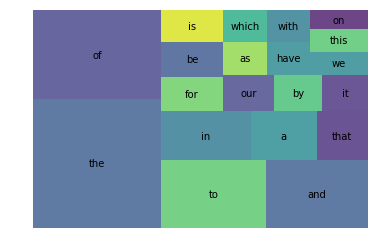

In [50]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Tokenize Spacy

In [51]:
tokenizer = Tokenizer(nlp.vocab)

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['content'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

df['tokens'].head()

125                                                   []
127    [Fellow-Citizens, of, the, Senate, and, House,...
138    [Fellow-Citizens, of, the, Senate, and, House,...
136    [Fellow-Citizens, of, the, Senate, and, House,...
163    [Fellow-Citizens, of, the, Senate, and, House,...
Name: tokens, dtype: object

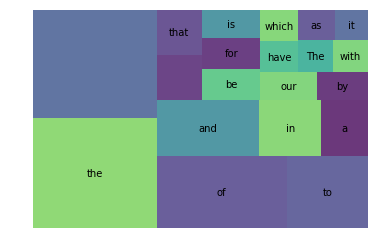

In [52]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [53]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12,the,227,137568,1.0,0.071619,0.071619,0.995614
284,\n,227,135374,2.0,0.070477,0.142095,0.995614
497,of,227,95751,3.0,0.049849,0.191944,0.995614
281,to,227,59303,4.0,0.030874,0.222817,0.995614
702,and,227,58152,5.0,0.030274,0.253092,0.995614
174,in,227,35144,6.0,0.018296,0.271388,0.995614
106,a,227,26490,7.0,0.013791,0.285179,0.995614
871,\n\n,227,20904,8.0,0.010883,0.296062,0.995614
512,that,227,20616,9.0,0.010733,0.306794,0.995614
371,be,227,18383,10.0,0.009570,0.316365,0.995614


# Stop Words

In [54]:
tokens = []

""" Update those tokens """
for doc in tokenizer.pipe(df['content'], batch_size=500):
    
    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
            
df['tokens'] = tokens

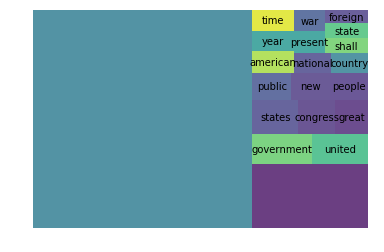

In [55]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Extending Stopwords

In [60]:
better_stop_words = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves", "\n", "government", "congress", "united", "states", "great",
    "\n\n"])

In [67]:
tokens = []

for doc in tokenizer.pipe(df['content'], batch_size=5000):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in better_stop_words:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [68]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

wc_top20['word']

281       public
295          new
1873      people
1982    american
180         year
489         time
459     national
343      country
30       present
816          war
288        shall
189        state
319         make
916      foreign
552        power
379          act
68       general
2224        work
3508       years
398          law
Name: word, dtype: object

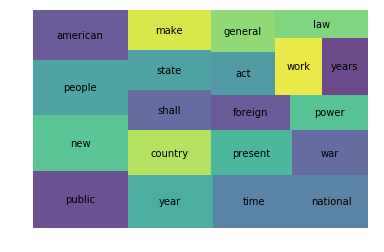

In [69]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Stemming

In [70]:
ps = PorterStemmer()

In [71]:
df['stems'] = df['tokens']

In [72]:
for _ in range(len(df['tokens'])):
    stems = []
    for word in df['tokens'][_]:
        stems.append(ps.stem(word))
    df['stems'][_] = stems

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [78]:
wc = count(df['stems'])

wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
552,nation,227,4488,1.0,0.005682,0.005682,0.995614
161,year,223,3895,2.0,0.004931,0.010613,0.978070
1626,american,212,3153,3.0,0.003992,0.014604,0.929825
1840,peopl,214,3002,4.0,0.003801,0.018405,0.938596
268,public,219,2995,5.0,0.003792,0.022197,0.960526


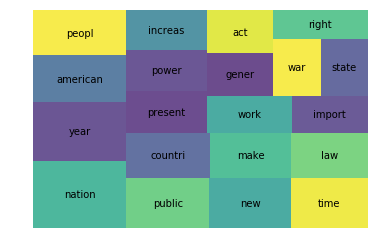

In [79]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# Lemmatization

In [80]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [81]:
df['lemmas'] = df['content'].apply(get_lemmas)

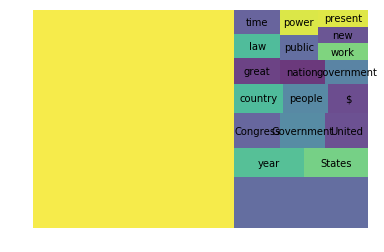

In [82]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)

In [ ]:
import requests
import bs4
from bs4 import BeautifulSoup
import time

In [ ]:
jobs = []
companies = []
locations = []
summaries = []

max_results_per_city = 100
city_set = ["Dallas"]
for city in city_set:
      for start in range(0, max_results_per_city, 10):
        page = requests.get("https://www.indeed.com/jobs?q=data+scientist&l=" + str(city) + "&start=" + str(start))
        time.sleep(1)                      
        soup = BeautifulSoup(page.text, "lxml") 
        # for each row
        for div in soup.find_all(name="div", attrs={"class":"row"}):
            # Job title
            for i in div.findAll(name="a", attrs={"data-tn-element":"jobTitle"}):
                job_title = i["title"]
                if len(job_title) > 0:
                    jobs.append(job_title)
                else:
                    jobs.append('not found')
            # Company    
            for i in div.findAll(name="span", attrs={"class":"company"}):
                company = i.text
                if len(company) > 0:
                    companies.append(company)
                else:
                    companies.append('not found')
            # Location    
            for i in div.findAll("div", attrs={"class": "recJobLoc"}):
                location = i['data-rc-loc']
                if len(location) > 0:
                    locations.append(location)
                else:
                    location.append('not found')
            # Summary  
            for i in div.findAll("div", attrs={"class": "summary"}):
                summary = i.text
                if len(summary) > 0:
                    summaries.append(summary)
                else:
                    summary.append('not found')

len(jobs), len(companies), len(locations), len(summaries)

In [ ]:
jobs = pd.DataFrame({'job_title':jobs,
          'company':companies,
          'location':locations,
          'summary':summaries})

In [ ]:
def clean(df):
    df['company'] = df['company'].str.strip()
    df['summary'] = df['summary'].str.strip()
    df['state'] = df['location'].str[-2:]
    df['state'] = df['state'].where(df['state'] == 'TX')
    df = df.dropna(axis = 0)
    
clean(jobs)